# ÌèâÍ∞Ä Í∏∞Ï§Ä
    1. ÏûêÍ∏∞ÎßåÏùò Ïπ¥Î©îÎùºÏï± Í∏∞Îä• Íµ¨ÌòÑÏùÑ ÌôòÏàòÌïòÏòÄÎã§
    2. Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Ï†ïÌôïÌïú ÏõêÎ≥∏ ÏúÑÏπòÏóê Î∞òÏòÅÌïòÏòÄÎã§.
    3. Ïπ¥Î©îÎùº Ïä§Ìã∞Ïª§Ïï±ÏùÑ Îã§ÏñëÌïú ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê Ï†ÅÏö©ÌñàÏùÑÎïå Î¨∏Ï†úÏ†êÏùÑ Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú Î∂ÑÏÑùÌïòÏòÄÎã§.
-------------------------------


# Step 1. Ïä§Ìã∞Ïª§ Íµ¨ÌïòÍ∏∞ or ÎßåÎì§Í∏∞
--------------------------------------------------
# Step 2. ÏñºÍµ¥ Í≤ÄÏ∂ú& ÎûúÎìúÎßàÌÅ¨ Í≤ÄÏ∂úÌïòÍ∏∞

    1) bounding box ÏúÑÏπò Ï∞æÍ∏∞
    2) landmark  ÏúÑÏπò Ï∞æÍ∏∞

### ÏñºÍµ¥ÏÇ¨ÏßÑ Î∂àÎü¨Ïò§Í∏∞

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

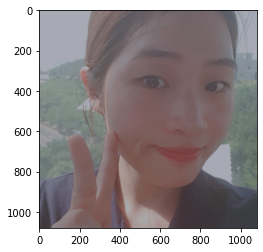

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/9.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò¥
img_show = img_bgr.copy()      # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥Ä

# ÏÉâÏÉÅ Î≥¥Ï†ïÌï¥Ï£ºÍ∏∞ BGR =>RGBÏàúÏúºÎ°ú Î≥ÄÍ≤ΩÌï¥Ï§å
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

#Ï∂úÎ†•Ìï¥Î≥¥Í∏∞
plt.imshow(img_rgb)
plt.show()

### 2.1)ÏñºÍµ¥ ÏúÑÏπò Ï∞æÍ∏∞ (bounding box ÏúÑÏπò Ï∞æÍ∏∞)


rectangles[[(354, 133) (1019, 798)]]


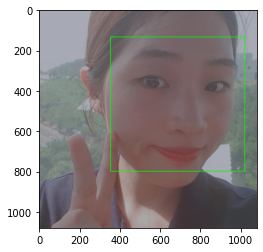

In [3]:
# hog detector ÏÑ†Ïñ∏
detector_hog = dlib.get_frontal_face_detector()


dlib_rects = detector_hog(img_rgb, 1)   
# detector_hog(image, num of image pyramid(Ïù¥ÎØ∏ÏßÄ ÌååÎùºÎØ∏ÌÑ∞Ïàò))

# ÏñºÍµ¥Ïùò Ï¢åÌëú Ï∂úÎ†•
print(dlib_rects) 

# ÏñºÍµ¥Ïóê bounding box Í∑∏Î¶¨Í∏∞
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 2.2) ÏñºÍµ¥Ïóê ÎûúÎìú ÎßàÌÅ¨ (face landmark localization) ÏÉùÏÑ±ÌïòÍ∏∞

68


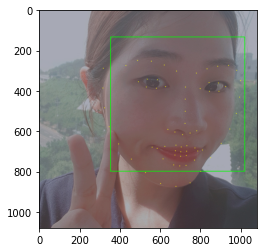

In [4]:
# Ï†ÄÏû•Ìïú landmarkÎ™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

#landmark_predictor Îäî RGB Ïù¥ÎØ∏ÏßÄÏôÄ dlib.rectangleÏùÑ ÏûÖÎ†• Î∞õÏïÑ dlib.full_object_detection Î•º Î∞òÌôò

list_landmarks = []

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÖÎãàÎã§
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark Ï¢åÌëúÎ•º Ï†ÄÏû•Ìï¥Îë°ÎãàÎã§
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0])) #68Í∞úÏùò ÎûúÎìú ÎßàÌÅ¨Í∞Ä ÏÉùÏÑ±Îê®

#  ÎûúÎìú ÎßàÌÅ¨ ÏòÅÏÉÅ Ï∂úÎ†•ÌïòÍ∏∞

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step 3. Ïä§Ìã∞Ïª§ Ï†ÅÏö© ÏúÑÏπò ÌôïÏù∏ÌïòÍ∏∞
    - landmarkÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú Í≥ÑÏÇ∞ÌïòÍ∏∞

In [5]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§  / ÏΩîÏùò Ï§ëÏã¨Ï†ê ÏúÑÏπò
    x = landmark[30][0]
    y = landmark[30][1]# - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    

(723, 561)
(x,y) : (723,561)
(w,h) : (666,666)


In [6]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(666, 666, 3)


In [7]:
refined_x = x - w // 2
refined_y = y - h//2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (390,228)


In [8]:
# Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ Î≤îÏúÑÎ•º ÎÑòÏñ¥Í∞ÄÎ©¥ Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º ÏõêÎ≥∏Ïóê ÎßûÏ∂∞ ÌÅ¨Î°≠Ìï®
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


(x,y) : (390,228)


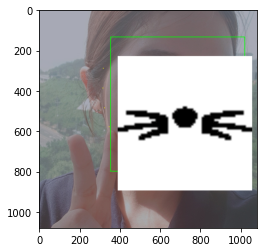

In [9]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==1,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## Step 4. Ïä§Ìã∞Ïª§ Ï†ÅÏö©ÌïòÍ∏∞
    1) np.whereÏùÑ Ïù¥Ïö©Ìï¥ Ïä§Ìã∞Ïª§ Ï†ÅÏö©ÌïòÍ∏∞
    2) Ïä§Ìã∞Ïª§ Ìà¨Î™ÖÎèÑ Ï°∞Ï†àÌïòÍ∏∞ (Ï∞∏Ï°∞. opencv=> cv2.addWeighted())
    https://www.youtube.com/watch?v=FTSgFFQGkho

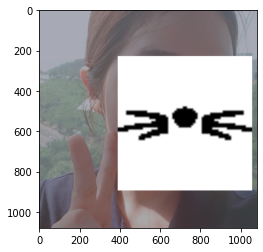

In [10]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==1,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## Ïä§Ìã∞Ïª§Î•º ÏûêÏó∞Ïä§ÎüΩÍ≤å ÎßåÎì§Í∏∞


In [11]:
img_bgr = cv2.imread(my_image_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò¥
img_show = img_bgr.copy()      # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥Ä

# ÏÉâÏÉÅ Î≥¥Ï†ïÌï¥Ï£ºÍ∏∞ BGR =>RGBÏàúÏúºÎ°ú Î≥ÄÍ≤ΩÌï¥Ï§å
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

etector_hog = dlib.get_frontal_face_detector()


dlib_rects = detector_hog(img_rgb, 1)   
# detector_hog(image, num of image pyramid(Ïù¥ÎØ∏ÏßÄ ÌååÎùºÎØ∏ÌÑ∞Ïàò))


# ÏñºÍµ¥Ïóê bounding box Í∑∏Î¶¨Í∏∞
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
landmark_predictor = dlib.shape_predictor(model_path)

#landmark_predictor Îäî RGB Ïù¥ÎØ∏ÏßÄÏôÄ dlib.rectangleÏùÑ ÏûÖÎ†• Î∞õÏïÑ dlib.full_object_detection Î•º Î∞òÌôò

list_landmarks = []

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÖÎãàÎã§
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark Ï¢åÌëúÎ•º Ï†ÄÏû•Ìï¥Îë°ÎãàÎã§
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)


#  ÎûúÎìú ÎßàÌÅ¨ ÏòÅÏÉÅ Ï∂úÎ†•ÌïòÍ∏∞

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)


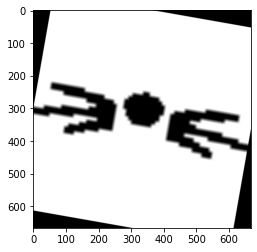

In [12]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_sticker = cv2.resize(img_sticker, (w,h))

cp = (w/2, h/2)
rotation = cv2.getRotationMatrix2D(cp, 350,1)
rotated_img = cv2.warpAffine(img_sticker, rotation, (w,h))
plt.imshow(rotated_img)

In [13]:
refined_x = x - w // 2
refined_y = y-h //2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (390,228)


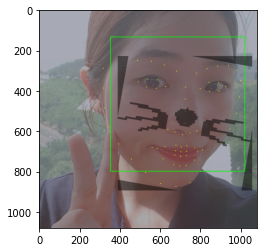

In [14]:
# ÌöåÏ†Ñ ÏãúÌÇ®Í±∏ Ï†ÅÏö©Ìï¥Î¥Ñ => Í≤ÄÏùÄ ÏÉâ Î∞îÌÉï ÎïåÎ¨∏Ïóê ÏÇ¨Ïö©Ïù¥ Ïñ¥Î†§Ïö∏ Í≤É Í∞ôÏùå 
sticker_area = img_show[refined_y:refined_y+rotated_img.shape[0], refined_x:refined_x+rotated_img.shape[1]]
img_show[refined_y:refined_y+rotated_img.shape[0], refined_x:refined_x+rotated_img.shape[1]] = \
        np.where(rotated_img==0, cv2.addWeighted(sticker_area, 0.5,rotated_img, 0.5, 0), sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

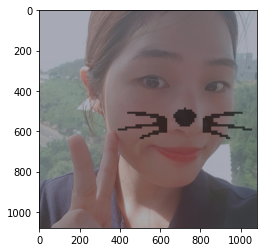

In [15]:
#ÌöåÏ†Ñ ÏãúÌÇ§ÏßÄ ÏïäÏùÄ Î≤ÑÏ†ÑÏúºÎ°ú Ï∂úÎ†•Ìï®
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==0, cv2.addWeighted(sticker_area, 0.4, img_sticker, 0.6, 0), sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

 ## ÏïåÍ≤åÎêú Í≤É
 
 1) cv2.addWeighted() 
 
     - Í∞ÄÏ§ëÏπò Ìï©, ÌèâÍ∑†Ïó∞ÏÇ∞ :Í∞ôÏùÄ ÏúÑÏπòÏóê Ï°¥Ïû¨ÌïòÎäî ÌîΩÏÖÄ Í∞íÏóê ÎåÄÌïòÏó¨
         Í∞ÄÏ§ëÌï©ÏùÑ Í≥ÑÏÇ∞ÌïòÏó¨ Í≤∞Í≥º ÏòÅÏÉÅÏùò ÌîΩÏÖÄ Í∞íÏúºÎ°ú ÏÑ§Ï†ï
     - cv2.addWeighted(src1, alpha, src2, beta, gamma, dst=None, dtype=None)
         - src1: (ÏûÖÎ†•) Ï≤´ Î≤àÏß∏ ÏòÅÏÉÅ
         - alpha: Ï≤´ Î≤àÏß∏ ÏòÅÏÉÅ Í∞ÄÏ§ëÏπò
         - src2: Îëê Î≤àÏß∏ ÏòÅÏÉÅ. src1Í≥º Í∞ôÏùÄ ÌÅ¨Í∏∞ & Í∞ôÏùÄ ÌÉÄÏûÖ
         - beta: Îëê Î≤àÏß∏ ÏòÅÏÉÅ Í∞ÄÏ§ëÏπò
         - gamma: Í≤∞Í≥º ÏòÅÏÉÅÏóê Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú ÎçîÌï† Í∞í
         - dst: Í∞ÄÏ§ëÏπò Ìï© Í≤∞Í≥º ÏòÅÏÉÅ
         - dtype: Ï∂úÎ†• ÏòÅÏÉÅ(dst)Ïùò ÌÉÄÏûÖ
         
 Ïù¥Î°† Ï∞∏Í≥†_https://deep-learning-study.tistory.com/115
 
 ------------------------------------------------------
 
 2) cv2.getRotationMatrix2D()

    - ÌöåÏ†Ñ Î≥ÄÌôò : ÏòÅÏÉÅÏùÑ ÌäπÏ†ï Í∞ÅÎèÑÎßåÌÅº Î≥ÄÌôò ÏãúÌÇ¥(Î∞òÏãúÍ≥Ñ Î∞©Ìñ•)
    - ÏòÅÏÉÅÏùò Ï§ëÏïôÏùÑ Í∏∞Ï§ÄÏ†êÏúºÎ°ú ÌöåÏ†Ñ ÏãúÌÇ¥
    - Ìï®Ïàò ÏÑ§Î™Ö_cv2.getRotationMatrix2D(center, angle, scale) -> retval
         - center: ÌöåÏ†Ñ Ï§ëÏã¨ Ï¢åÌëú. (x, y) ÌäúÌîå.
         - angle: (Î∞òÏãúÍ≥Ñ Î∞©Ìñ•) ÌöåÏ†Ñ Í∞ÅÎèÑ(degree). ÏùåÏàòÎäî ÏãúÍ≥Ñ Î∞©Ìñ•.
         - scale: Ï∂îÍ∞ÄÏ†ÅÏù∏ ÌôïÎåÄ ÎπÑÏú®
         - retval: 2x3 Ïñ¥ÌååÏù∏ Î≥ÄÌôò ÌñâÎ†¨. Ïã§ÏàòÌòï
         
Ïù¥Î°† Ï∞∏Í≥†_https://deep-learning-study.tistory.com/199
        
---------------------------------------------

3) Ïù¥ÎØ∏ÏßÄ ÎèåÎ¶¨Í∏∞& Ìà¨Î™ÖÎèÑ Ï°∞Ï†à ÏΩîÎìú Ï∞∏Í≥†

https://m.blog.naver.com/totoro772/222622170248

---------------------------------------

4) dlib detecto ÌäπÏÑ±

     - dlib detector Îäî dlib.rectangles ÌÉÄÏûÖÏùò Í∞ùÏ≤¥Î•º Î∞òÌôò
     - dlib.rectangles Îäî dlib.rectangle Í∞ùÏ≤¥Ïùò Î∞∞Ïó¥ ÌòïÌÉúÎ°ú Ïù¥Î£®Ïñ¥Ïßê
     - dlib.rectangleÍ∞ùÏ≤¥Ïùò Ìï®Ïàò: left(), top(), right(), bottom(), height(), width()
     
-------------------
5) where Ìï®Ïàò
    - ÌäπÏ†ï Ï°∞Í±¥Ïóê ÎßûÎäî ÏõêÏÜåÏùò ÏúÑÏπòÎ•º Î∞òÌôò
    - ÌäπÏ†ï Ï°∞Í±¥Ïóê ÎßûÎäî ÏõêÏÜåÏôÄ Í∑∏Î†áÏßÄ ÏïäÏùÄ ÏõêÏÜåÎ•º ÏõêÌïòÎäî Í∞íÏúºÎ°ú Î≥ÄÍ≤Ω
    
    5.1) .astype()
        - ArrayÎ•º ÌÜµÏ±ÑÎ°ú ÌòïÏùÑ Î≥ÄÌôòÌï†Îïå ÏÇ¨Ïö©Ìï®
     
 


# Step5. Î¨∏Ï†úÏ†ê Ï∞æÏïÑÎ≥¥Í∏∞
    1) Îã§ÏñëÌïú Í∞ÅÎèÑÏóêÏÑú Ï∞∞ÏòÅÌïú ÏÇ¨ÏßÑÏúºÎ°ú Ïä§Ìã∞Ïª§ Î∞òÎ≥µ Ï†ÅÏö©
    
    2) Î¨∏Ï†úÏ†êÏù¥ Î¨¥ÏóáÏù∏ÏßÄ ÏµúÎåÄÌïú ÏûêÏÑ∏ÌïòÍ≤å Í∏∞Î°ù
        - ÏñºÍµ¥Í∞ÅÎèÑÏóê Îî∞Îùº Ïä§Ìã∞Ïª§Í∞Ä Ïñ¥ÎñªÍ≤å Î≥ÄÌï¥Ïïº Ìï†Íπå?
        - Î©ÄÎ¶¨ÏÑú Ï¥¨Ïö©ÌïòÎ©¥ ÏïàÎêòÎäî Ïù¥Ïú†
        - Ïã§Ìñâ ÏÜçÎèÑ Ï§ëÏöî?
        - Ïä§Ìã∞Ïª§ Ïï±ÏùÑ ÎßåÎì§ Îïå Ï†ïÌôïÎèÑÍ∞Ä ÏñºÎßàÎÇò Ï§ëÏöîÌï†Íπå?

Ïä§Ìã∞Ïª§ Ìà¨Î™ÖÎèÑ Ï°∞Ï†àÌïòÍ∏∞

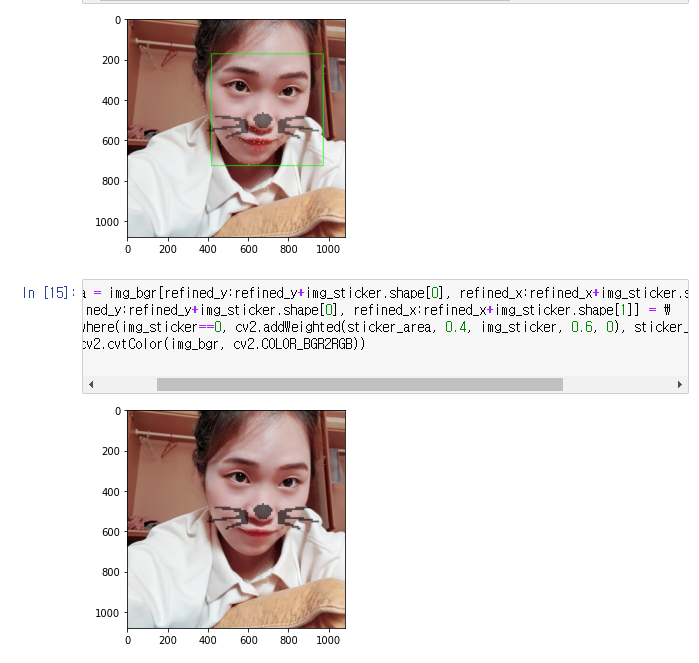



# Îã§ÏñëÌïú Í∞ÅÎèÑÏùò ÏÇ¨ÏßÑ
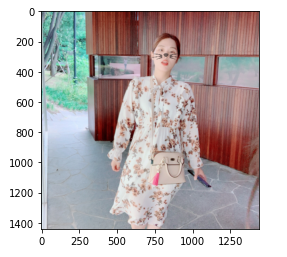

    ÏÇ¨ÏßÑÏú†Ìòï) ÏñºÍµ¥Ïù¥ Î≥¥Ïù¥Îäî Ï†ÑÏã†ÏÉ∑ : ÏñºÍµ¥Ïùò Î≤îÏúÑÎ•º ÏÇ¥Ïßù Î≤óÏñ¥ÎÇ® & Í∞ÅÎèÑÍ∞Ä ÌãÄÏñ¥Ïßê


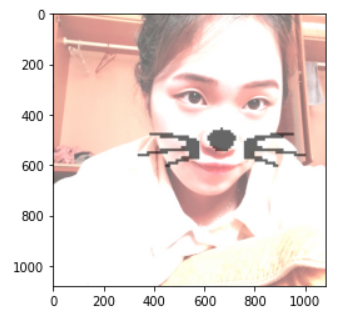 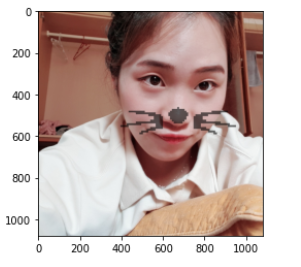
ÏÇ¨ÏßÑ Ïú†Ìòï) ÏúÑÏóêÏÑú Ï∞çÏùÄ ÏÇ¨ÏßÑ & Î∞ùÍ∏∞ Î≥ÄÍ≤Ω
    :Í∞ÅÎèÑÍ∞Ä ÏïàÎßûÏùå Î∞ùÍ∏∞Ïóê Îî∞Î•∏ Î≥ÄÌôîÎäî Î™®Î•¥Í≤†Ïùå (Î∞ùÏùÄÍ≤å Ïä§Ìã∞Ïª§Í∞Ä ÏÇ¥Ïßù Îçî ÏûòÎ≥¥Ïù¥Îäî ÎäêÎÇå)

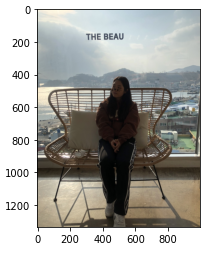
ÏÇ¨ÏßÑ Ïú†Ìòï) Ïñ¥ÎëêÏö¥ Ï†ÑÏã†ÏÇ¨ÏßÑ : ÎÑàÎ¨¥ Ïñ¥ÎëêÏõåÏÑú Ïä§Ìã∞Ïª§ ÌôïÏù∏Î∂àÍ∞Ä

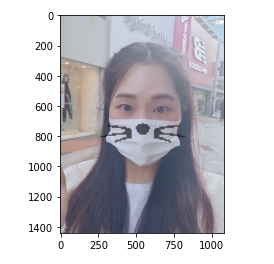
ÏÇ¨ÏßÑÏú†Ìòï)Ï†ïÎ©¥& ÎßàÏä§ÌÅ¨ Ï∞©Ïö© : ÏñºÍµ¥Î≥¥Îã§ Îçî ÎÑìÏùÄ Î≤îÏúÑÍ∞Ä Ïù∏ÏãùÎêòÏÑú ÏñºÍµ¥Î≥¥Îã§ Ïä§Ìã∞Ïª§Í∞Ä Îçî ÌÅº

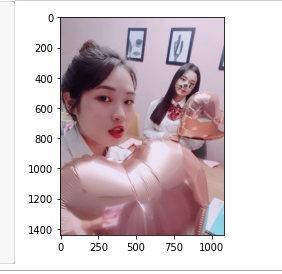
ÏÇ¨ÏßÑÏú†Ìòï) 2Î™Ö ÌïúÎ™ÖÏùÄ Ï∏°Î©¥ & ÌïúÎ™ÖÏùÄ ÎπÑÍµêÏ†Å Ï†ïÎ©¥

---------------------------

## ÎÇ¥Í∞Ä ÏÉùÍ∞ÅÌïòÎäî Î¨∏Ï†úÏ†ê

    1. ÏñºÍµ¥ Ïù∏Ïãù Î∂ÄÎ∂Ñ
        - ÎßàÏä§ÌÅ¨Î•º Ïì¥ ÏÇ¨ÏßÑ
        - Ï∏°Î©¥ ÏÇ¨ÏßÑ
        - Ïñ¥ÎëêÏö¥ ÏÇ¨ÏßÑ
        - ÏúÑÏóêÏÑú Ï∞çÏùÄ ÏÇ¨ÏßÑ
        - ÏñºÍµ¥Ïù¥ ÎÑàÎ¨¥ ÏûëÍ≤å ÎÇòÏò® ÏÇ¨ÏßÑ
        => ÏñºÍµ¥ÏùòÎ≥¥Îã§ Îçî ÎÑìÍ±∞ÎÇò ÏûëÏùÄ Î≤îÏúÑÎ•º ÏñºÍµ¥Î°ú Ïù∏ÏãùÌñàÎã§.
        => ÌäπÌûà Ïã¨Ìïú Ï∏°Î©¥ ÏÇ¨ÏßÑÏùò ÏΩîÏùò ÏúÑÏπòÎèÑ Ï†ïÌôïÌïòÍ≤å Ïù∏ÏãùÎêòÏßÄ ÏïäÏïòÎã§.
        
    2. Ïä§Ìã∞Ïª§Î•º Î∂ôÏù¥Îäî Í≤É
        - ÏÖÄÏπ¥Î•º Ï∞çÏùÑÎïå Ï†ïÎ©¥ÏúºÎ°ú Ï∞çÎäî ÏÇ¨ÏßÑÏùÄ Î≥ÑÎ°ú ÏóÜÎäîÎç∞ Ïù¥Îü¨Ìïú Î∞©ÏãùÏúºÎ°ú Ïä§Ìã∞Ïª§Î•º
          Î∂ôÏù¥Í≤å ÎêòÎ©¥ ÏñºÍµ¥ Í∞ÅÎèÑÏóê Îî∞Îùº Ïä§Ìã∞Ïª§Ïùò Í∞ÅÎèÑÎ•º Ï°∞Ï†ïÌï¥Ï£ºÏñ¥ÏïºÌïúÎã§Îäî Î¨∏Ï†úÍ∞Ä 
          Î∞úÏÉùÌïòÏòÄÎã§.
          
--------------------------------

## [ÏßàÎ¨∏]
    1. Ïä§Ìã∞Ïª§Ïùò Ìà¨Î™ÖÎèÑÎ•º Ï°∞Ï†àÌïòÍ∏∞ Ï†ÑÏóêÎäî np.where()ÏóêÏÑú mg_sticker== Î∂ÄÎ∂ÑÏù¥ 1Ïù¥Ïñ¥Ïïº ÏΩîÎ∂ÄÎ∂ÑÏù¥ Í≤ÄÏ†ïÏÉâÏúºÎ°ú Î≥¥ÏòÄÎäîÎç∞ Ìà¨Î™ÖÎèÑÎ•º Ï°∞Ï†àÌïòÍ∏∞ 1Î°ú Î≥ÄÍ≤ΩÌïòÎ©¥ Ïä§Ìã∞Ïª§Í∞Ä Î≥¥Ïù¥ÏßÄ ÏïäÎäîÏù¥Ïú†?
    
    2.cv2.addWeighted()ÏóêÏÑú Ïä§ÏºÄÏùºÏù¥ Îã§Î•∏Îç∞ Ïù¥ÎØ∏ÏßÄÍ∞Ä Ìï©ÏÑ± Îê†Ïàò ÏûàÏóàÎçò Ïù¥Ïú†?
    
    3. Ïù∏ÏãùÏùÄ ÎëòÎã§ ÎêòÎäîÎç∞ Ïä§Ìã∞Ïª§Îäî Ïôú ÌïúÎ™ÖÎßå Ï†ÅÏö©ÎêòÎäîÏßÄ?
   
        ->ÎßåÏïΩ ÌïòÎÇòÎßå Í∑∏Î¶¨ÎèÑÎ°ù Îêú Í≤ÉÏù¥Î©¥ Ïôú ÏñºÍµ¥Ïù¥ ÌÅ∞ ÎÇ¥ÏñºÍµ¥Ïù¥ ÏïÑÎãàÎùº 
            ÏûëÍ≤å ÎÇòÏò® ÏπúÍµ¨ ÏÇ¨ÏßÑÏóê Ïä§Ìã∞Ïª§Í∞Ä Ï†ÅÏö©ÎêúÍ±¥ÏßÄ?
            => Ï∏°Î©¥ÏÇ¨ÏßÑÏù¥Ïó¨ÏÑú Ïù∏ÏãùÏù¥ ÏïàÎêòÎäî Í±¥Í∞Ä? 
                Ï†ïÎ©¥ÏùÑ Î≥¥Í≥† ÏûàÎäî Ïó¨Îü¨Î™ÖÏù¥ ÎÇòÏò® ÏÇ¨ÏßÑÏùÑ Ï†ÅÏö©
            => Ïó≠Ïãú ÌïòÎÇòÏùò ÏÇ¨ÏßÑÏóêÎßå Ï†ÅÏö©Îê® Ïä§Ìã∞Ïª§Í∞Ä Í∑∏Îü¨Ïßà ÏñºÍµ¥Ïùò Í∏∞Ï§ÄÏùÄ Î≠òÍπå>
            
-------------------

## [Ìï¥Í≤∞Î∞©Î≤ïÏùÄ Î¨¥ÏóáÏùºÍπå?]
 
 -Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º cv2.getRotationMatrix2DÎ•º Ïù¥Ïö©Ìï¥ ÎèåÎ¶¨Îãà Í≤ÄÏùÄ ÏÉâ Î∞∞Í≤ΩÏù¥ ÏÉùÍ≤ºÎã§. Ïù¥Î•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Î•º ÌôïÎåÄÌïòÎ©¥ Ïä§Ìã∞Ïª§Í∞Ä ÎÑàÎ¨¥ Ïª§ÏßÄÍ±∞ÎÇò Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏùºÎ∂Ä ÏûòÎ¶¨Îäî Î¨∏Ï†úÍ∞Ä Î∞úÏÉùÌïòÏòÄÎã§.
    

----------------------

## ÌöåÍ≥†


Ïä§Ìã∞Ïª§Î•º ÏûêÏó∞Ïä§ÎüΩÍ≤å ÌïòÎäî Î∞©Î≤ïÏùÑ Ï°∞ÏÇ¨ÌïòÍ∏∞ ÏúÑÌï¥ ÌûåÌä∏ÏòÄÎçò  addWeighted() Î©îÏÑúÎìúÏóê ÎåÄÌï¥ Í≥µÎ∂ÄÌïòÍ≥† Ïù¥Ï†ú Ï†ÅÏö©Ìï¥ Î¥êÏïºÏßÄ! ÌïòÎäîÎç∞ Îëê ÏÇ¨ÏßÑÏùò ÌÅ¨Í∏∞Í∞Ä Îã¨ÎùºÏÑú Ï†ÅÏö©Ìï† Ïàò ÏóÜÎã§Îäî Í≤ΩÍ≥† Î¨∏Íµ¨Í∞Ä Îñ¥Îã§. Í∑∏ÎûòÏÑú Îçî Ï°∞ÏÇ¨Ìï¥ Î¥§ÎäîÎç∞ Ï†Ä Î©îÏÑúÎìúÎ•º Ïì¥ ÏòàÏãúÎì§Ïù¥ Îã§ ÏÇ¨ÏßÑÏùò ÌÅ¨Í∏∞Í∞Ä Í∞ôÏïòÍ≥† Í∞ôÏùÄ ÌÅ¨Í∏∞Ïùò Ïù¥ÎØ∏ÏßÄÎ•º ÎßåÎì§Ïñ¥ Ï§òÏïºÌïúÎã§Í≥† ÎÇòÏôÄÏûàÏóàÎã§.
 Ïôú Ï†ÄÎ†áÍ≤å ÌïòÎ©¥ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûëÍ≤å Ï†ÅÏö©ÎêòÎäîÏßÄ Ïù¥Ìï¥Í∞Ä ÏïàÎêêÎã§. Í∑∏ÎûòÏÑú np.whereÏùÑ Î™∞ÎùºÏÑú Ïù¥Ìï¥Î•º Î™ªÌïòÎäî Í≤É Í∞ôÏïÑ Í∑∏Í≤ÉÎèÑ Í≥µÎ∂ÄÌï¥ Î¥§ÎäîÎç∞ ÏïÑÏßÅÎèÑ Î™®Î•¥Í≤üÎã§üò≠
